<a href="https://colab.research.google.com/github/elie-benayoun/GhosTown/blob/master/Dor_Hotel_Corona_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

missions:
1. identify same hotels
2. EDA of market before and after corona
3. compare the features of before and after

# Hotel Corona

## Import data

First mount your drive to this notebook using this command:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now find your data folder path, and load the dataset from there

In [ ]:
path_data_dor =  '/content/drive/My Drive/Learning_ML/ITC Program/Hackathon/SETS'
os.listdir(path_data_dor) # test

['AB_NYC_08_2019.csv', 'AB_NYC_05_2020.csv']

In [ ]:
# colab output:
output_folder_path = '.'
output_folder_path = Path(output_folder_path)

In [ ]:
path_data_dor_old = path_data_dor + '/AB_NYC_08_2019.csv'
path_data_dor_new = path_data_dor + '/AB_NYC_05_2020.csv'

In [ ]:
df_old = pd.read_csv(path_data_dor_old)
df_new = pd.read_csv(path_data_dor_new)
display(df_old.head(), df_new.head())

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2060,https://www.airbnb.com/rooms/2060,20200506054410,2020-05-09,Modern NYC,NaN,"Lovely, spacious, sunny 1 BR apartment in 6th ...","Lovely, spacious, sunny 1 BR apartment in 6th ...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/3755/3f9d3...,NaN,2259,https://www.airbnb.com/users/show/2259,Jenny,2008-08-18,US,NaN,a few days or more,22%,50%,f,https://a0.muscache.com/im/users/2259/profile_...,https://a0.muscache.com/im/users/2259/profile_...,Washington Heights,0.0,0.0,['reviews'],t,f,"New York, NY, United States",Washington Heights,Washington Heights,...,$0.00,1,730,1,1,730,730,1.0,730.0,3 months ago,t,1,1,1,1,2020-05-09,1,0,2008-09-22,2008-09-22,80.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,0.01
1,2595,https://www.airbnb.com/rooms/2595,20200506054410,2020-05-08,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...","- Spacious (500+ft²), immaculate and nicely fu...","Beautiful, spacious skylit studio in the heart...",none,Centrally located in the heart of Manhattan ju...,NaN,Apartment is located on 37th Street between 5t...,"Guests have full access to the kitchen, bathro...",I am a Sound Therapy Practitioner and Kundalin...,"Make yourself at home, respect the space and t...",NaN,NaN,https://a0.muscache.com/im/pictures/f0813a11-4...,NaN,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a few hours,96%,35%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, NY, United States",Manhattan,Midtown,...,$0.00,3,1125,3,3,1125,1125,3.0,1125.0,2 months ago,t,30,60,90,365,2020-05-08,48,4,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.38
2,3831,https://www.airbnb.com/rooms/3831,20200506054410,2020-05-08,Cozy Entire Floor of Brownstone,Urban retreat: enjoy 500 s.f. floor in 1899 br...,Greetings! We own a double-duplex brownst...,Urban retreat: enjoy 500 s.f. floor in 1899 br...,none,Just the right mix of urban center and local n...,"IF YOU ARE SAME-DAY BOOKING, PLEASE LET ME KNO...",B52 bus for a 10-minute ride to downtown Brook...,"You will have the private, exclusive use of an...","We'll be around, but since you have the top fl...",Smoking - outside please; pets allowed but ple...,NaN,NaN,https://a0.muscache.com/im/pictures/e49999c2-9...,NaN,4869,https://www.airb

In [ ]:
relevant_data = set(df_old.columns).intersection(set(df_new.columns))
right = pd.merge(left=df_new[relevant_data], right=df_old[relevant_data], on=['latitude', 'longitude', 'id'], how='right', suffixes=('_after', '_before'))
right

,room_type_after,minimum_nights_after,neighbourhood_after,id,number_of_reviews_after,last_review_after,reviews_per_month_after,longitude,host_name_after,calculated_host_listings_count_after,host_id_after,name_after,price_after,availability_365_after,latitude,room_type_before,minimum_nights_before,neighbourhood_before,number_of_reviews_before,last_review_before,reviews_per_month_before,host_name_before,calculated_host_listings_count_before,host_id_before,name_before,price_before,availability_365_before
0,Entire home/apt,3.0,Manhattan,2595,48.0,2019-11-04,0.38,-73.98377,Jennifer,2.0,2845.0,Skylit Midtown Castle,$225.00,365.0,40.75362,Entire home/apt,1,Midtown,45,2019-05-21,0.38,Jennifer,2,2845,Skylit Midtown Castle,225,355
1,Entire home/apt,1.0,Clinton Hill,3831,318.0,2020-04-26,4.66,-73.95976,LisaRoxanne,1.0,4869.0,Cozy Entire Floor of Brownstone,$89.00,261.0,40.68514,Entire home/apt,1,Clinton Hill,270,2019-07-05,4.64,LisaRoxanne,1,4869,Cozy Entire Floor of Brownstone,89,194
2,Entire home/apt,3.0,Midtown East,5099,78.0,2019-10-13,0.58,-73.97500,Chris,1.0,7322.0,Large Cozy 1 BR Apartment In Midtown East,$200.00,0.0,40.74767,Entire home/apt,3,Murray Hill,74,2019-06-22,0.59,Chris,1,7322,Large Cozy 1 BR Apartment In Midtown East,200,129
3,Private room,29.0,Brooklyn,5121,50.0,2019-12-02,0.38,-73.95596,Garon,1.0,7356.0,BlissArtsSpace!,$60.00,365.0,40.68688,Private room,45,Bedford-Stuyvesant,49,2017-10-05,0.40,Garon,1,7356,BlissArtsSpace!,60,0
4,Private room,2.0,Manhattan,5178,473.0,2020-03-15,3.53,-73.98493,Shunichi,1.0,8967.0,Large Furnished Room Near B'way,$79.00,272.0,40.76489,Private room,2,Hell's Kitchen,430,2019-06-24,3.47,Shunichi,1,8967,Large Furnished Room Near B'way,79,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,NaN,NaN,NaN,36484087,NaN,NaN,NaN,-73.99183,NaN,NaN,NaN,NaN,NaN,NaN,40.76392,Private room,4,Hell's Kitchen,0,NaN,NaN,Kat,1,274321313,"Spacious Room w/ Private Rooftop, Central loca...",125,31
48891,NaN,NaN,NaN,36484363,NaN,NaN,NaN,-73.80844,NaN,NaN,NaN,NaN,NaN,NaN,40.69137,Private room,1,Jamaica,0,NaN,NaN,Michael,2,107716952,QUIT PRIVATE HOUSE,65,163
48892,NaN,NaN,NaN,36485431,NaN,NaN,NaN,-73.94867,NaN,NaN,NaN,NaN,NaN,NaN,40.81475,Entire home/apt,10,Harlem,0,NaN,NaN,Ilgar & Aysel,1,23492952,Sunny Studio at Historical Neighborhood,115,27
48893,NaN,NaN,NaN,36485609,NaN,NaN,NaN,-73.99112,NaN,NaN,NaN,NaN,NaN,NaN,40.75751,Shared room,1,Hell's Kitchen,0,NaN,NaN,Taz,6,30985759,43rd St. Time Square-cozy single bed,55,2


In [ ]:
right[right.isna()==False]

,room_type_after,minimum_nights_after,neighbourhood_after,id,number_of_reviews_after,last_review_after,reviews_per_month_after,longitude,host_name_after,calculated_host_listings_count_after,host_id_after,name_after,price_after,availability_365_after,latitude,room_type_before,minimum_nights_before,neighbourhood_before,number_of_reviews_before,last_review_before,reviews_per_month_before,host_name_before,calculated_host_listings_count_before,host_id_before,name_before,price_before,availability_365_before
0,Entire home/apt,3.0,Manhattan,2595,48.0,2019-11-04,0.38,-73.98377,Jennifer,2.0,2845.0,Skylit Midtown Castle,$225.00,365.0,40.75362,Entire home/apt,1,Midtown,45,2019-05-21,0.38,Jennifer,2,2845,Skylit Midtown Castle,225,355
1,Entire home/apt,1.0,Clinton Hill,3831,318.0,2020-04-26,4.66,-73.95976,LisaRoxanne,1.0,4869.0,Cozy Entire Floor of Brownstone,$89.00,261.0,40.68514,Entire home/apt,1,Clinton Hill,270,2019-07-05,4.64,LisaRoxanne,1,4869,Cozy Entire Floor of Brownstone,89,194
2,Entire home/apt,3.0,Midtown East,5099,78.0,2019-10-13,0.58,-73.97500,Chris,1.0,7322.0,Large Cozy 1 BR Apartment In Midtown East,$200.00,0.0,40.74767,Entire home/apt,3,Murray Hill,74,2019-06-22,0.59,Chris,1,7322,Large Cozy 1 BR Apartment In Midtown East,200,129
3,Private room,29.0,Brooklyn,5121,50.0,2019-12-02,0.38,-73.95596,Garon,1.0,7356.0,BlissArtsSpace!,$60.00,365.0,40.68688,Private room,45,Bedford-Stuyvesant,49,2017-10-05,0.40,Garon,1,7356,BlissArtsSpace!,60,0
4,Private room,2.0,Manhattan,5178,473.0,2020-03-15,3.53,-73.98493,Shunichi,1.0,8967.0,Large Furnished Room Near B'way,$79.00,272.0,40.76489,Private room,2,Hell's Kitchen,430,2019-06-24,3.47,Shunichi,1,8967,Large Furnished Room Near B'way,79,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,NaN,NaN,NaN,36484087,NaN,NaN,NaN,-73.99183,NaN,NaN,NaN,NaN,NaN,NaN,40.76392,Private room,4,Hell's Kitchen,0,NaN,NaN,Kat,1,274321313,"Spacious Room w/ Private Rooftop, Central loca...",125,31
48891,NaN,NaN,NaN,36484363,NaN,NaN,NaN,-73.80844,NaN,NaN,NaN,NaN,NaN,NaN,40.69137,Private room,1,Jamaica,0,NaN,NaN,Michael,2,107716952,QUIT PRIVATE HOUSE,65,163
48892,NaN,NaN,NaN,36485431,NaN,NaN,NaN,-73.94867,NaN,NaN,NaN,NaN,NaN,NaN,40.81475,Entire home/apt,10,Harlem,0,NaN,NaN,Ilgar & Aysel,1,23492952,Sunny Studio at Historical Neighborhood,115,27
48893,NaN,NaN,NaN,36485609,NaN,NaN,NaN,-73.99112,NaN,NaN,NaN,NaN,NaN,NaN,40.75751,Shared room,1,Hell's Kitchen,0,NaN,NaN,Taz,6,30985759,43rd St. Time Square-cozy single bed,55,2


In [ ]:
right.room_type_before.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type_before, dtype: int64

In [ ]:
right.room_type_after.value_counts()

Entire home/apt    17619
Private room       15021
Shared room          633
Hotel room           177
Name: room_type_after, dtype: int64

In [ ]:
right[right=='Hotel']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,room_type_after,minimum_nights_after,neighbourhood_after,id,number_of_reviews_after,last_review_after,reviews_per_month_after,longitude,host_name_after,calculated_host_listings_count_after,host_id_after,name_after,price_after,availability_365_after,latitude,room_type_before,minimum_nights_before,neighbourhood_before,number_of_reviews_before,last_review_before,reviews_per_month_before,host_name_before,calculated_host_listings_count_before,host_id_before,name_before,price_before,availability_365_before
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_old.columns, df_new.columns

(Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
        'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
        'minimum_nights', 'number_of_reviews', 'last_review',
        'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'],
       dtype='object'),
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        ...
        'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
        'require_guest_profile_picture', 'require_guest_phone_verification',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
       dtype='object', length=106))

# 1. identify same hotels using id


In [ ]:
df_old['id'].values

array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245])

In [ ]:
len(df_new['id']),len(df_old['id'])


(50246, 48895)

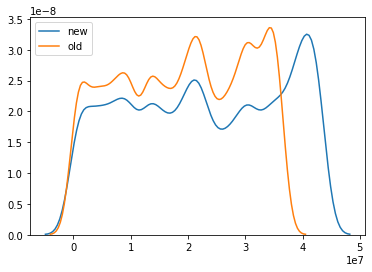

In [ ]:
sns.kdeplot(df_new['id'], label="new")
sns.kdeplot(df_old['id'], label="old")

In [ ]:
set(df_old['id'])

In [ ]:
np.where(df_old['id'].values==df_new['id'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], dtype=int64)

In [ ]:
same_ids = df_old['id'].eq(df_new['id'])==True
df_old['id'][same_ids]
display(df_old.loc[df_old['id'][same_ids]],df_new.loc[df_new['id'][same_ids]])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2595,1350055,Cozy room in Beautiful Williamsburg Appartment,2035472,Alessio,Brooklyn,Williamsburg,40.71449,-73.95905,Private room,85,3,2,2019-02-03,0.32,1,89


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2595,1735804,https://www.airbnb.com/rooms/1735804,20200506054410,2020-05-07,Lovely Suite in Historic Brownstone near Subway,This large suite on the top floor of historic ...,"Newly renovated, fully furnished, 1 bedroom ap...",This large suite on the top floor of historic ...,none,The apartment is located on a beautiful tree-l...,We own and rent all units in the building. For...,"Two short blocks from the subway's J Train, yo...",The apartment includes: - Free Street Parking ...,While we do not share the space with our guest...,No smoking or pets in the building please. Enj...,NaN,NaN,https://a0.muscache.com/im/pictures/63113142/0...,NaN,1755097,https://www.airbnb.com/users/show/1755097,Jay,2012-02-15,"Brooklyn, New York, United States",NaN,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/60ccd...,https://a0.muscache.com/im/pictures/user/60ccd...,Bedford-Stuyvesant,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Brooklyn, NY, United States",Brooklyn,Bedford-Stuyvesant,...,$50.00,2,365,2,2,1125,1125,2.0,1125.0,6 weeks ago,t,6,17,47,190,2020-05-07,241,37,2014-09-13,2020-03-14,96.0,10.0,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,t,2,2,0,0,3.5


In [ ]:
same_ids = list(set(df_new['id']) & set(df_old['id']))
len(same_ids)

35383

In [ ]:
same_ids[0]

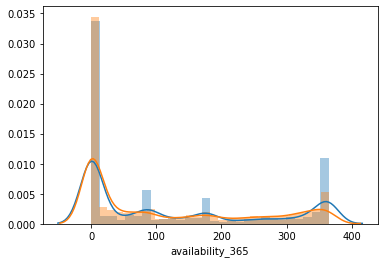

In [ ]:
sns.distplot(df_new.availability_365, label="new")
sns.distplot(df_old.availability_365, label="old")

In [ ]:
sns.displot(right.availability_365_after.value_counts(dropna=False))

AttributeError: ignored

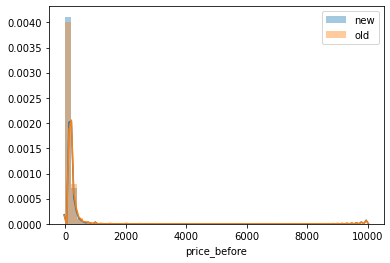

In [ ]:
# PRICE
#right.price_after = right.price_after.str.replace('$', '')
#right.price_after = (right.price_after.str.replace(',', '')).astype(float)
sns.distplot(right.price_after, label="new")
sns.distplot(right.price_before, label="old")
plt.legend()

In [ ]:
right['survived'] = right['host_id_after'].notnull() * 1

In [ ]:
right['last_review_before_datetime'] = pd.to_datetime(right.last_review_before)
right['last_review_after_datetime'] = pd.to_datetime(right.last_review_after)

In [ ]:
right['last_review_after_datetime'].value_counts(normalize=True,sort=False).sort_index()

2011-09-18    0.000036
2011-09-19    0.000036
2011-12-10    0.000036
2011-12-28    0.000036
2012-01-02    0.000036
                ...   
2020-05-04    0.001038
2020-05-05    0.000501
2020-05-06    0.000215
2020-05-07    0.000358
2020-05-08    0.000107
Name: last_review_after_datetime, Length: 2000, dtype: float64

In [ ]:
pd.DataFrame(right.last_review_before_datetime.value_counts(sort=False).sort_index()[-130:-69])['last_review_before_datetime'].sum()

2276

In [ ]:
pd.DataFrame(right.last_review_before_datetime.value_counts(sort=False).sort_index()[-130:-68]).values.sum()

2349

In [ ]:
pd.DataFrame(right.last_review_before_datetime.value_counts(sort=False).sort_index()).iloc[-62]

last_review_before_datetime    64
Name: 2019-05-08 00:00:00, dtype: int64

In [ ]:
pd.DataFrame(right.last_review_before_datetime.value_counts(sort=False).sort_index()).iloc[-130:-69]

,last_review_before_datetime
2019-03-01,23
2019-03-02,16
2019-03-03,25
2019-03-04,19
2019-03-05,15
...,...
2019-04-26,55
2019-04-27,86
2019-04-28,121
2019-04-29,80


In [ ]:
pd.DataFrame(right.last_review_before_datetime.value_counts(sort=False).sort_index()).iloc[-1]

last_review_before_datetime    89
Name: 2019-07-08 00:00:00, dtype: int64

In [ ]:
pd.DataFrame(right.last_review_after_datetime.value_counts(sort=False).sort_index()).iloc[-69]

last_review_after_datetime    257
Name: 2020-03-01 00:00:00, dtype: int64

In [ ]:
pd.DataFrame(right.last_review_after_datetime.value_counts(sort=False).sort_index()[-69:]).last_review_after_datetime.sum()

6200

In [ ]:
right.last_review_after_datetime.value_counts(normalize=True,sort=False).sort_index()

2011-09-18    0.000036
2011-09-19    0.000036
2011-12-10    0.000036
2011-12-28    0.000036
2012-01-02    0.000036
                ...   
2020-05-04    0.001038
2020-05-05    0.000501
2020-05-06    0.000215
2020-05-07    0.000358
2020-05-08    0.000107
Name: last_review_after_datetime, Length: 2000, dtype: float64

In [ ]:
len(right.last_review_before_datetime.value_counts(normalize=True,sort=False))

1764

In [ ]:
right.last_review_after

0        2019-11-04
1        2020-04-26
2        2019-10-13
3        2019-12-02
4        2020-03-15
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review_after, Length: 48895, dtype: object

AttributeError: ignored

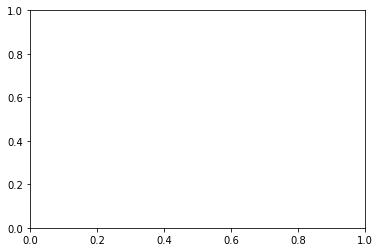

In [ ]:
sns.countplot(right.last_review_before_datetime, label="before", bins=20)


(array([   0,    1,    2, ..., 1997, 1998, 1999]),
 <a list of 2000 Text major ticklabel objects>)

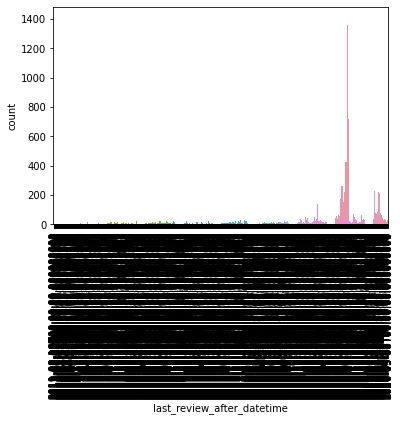

In [ ]:
sns.countplot(right.last_review_after_datetime, label="after")

plt.xticks(rotation=90)


In [ ]:
display(df_old[df_old.id==same_ids[0]], df_new[df_new.id==same_ids[0]])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [ ]:
same_ids = list(set(df_new['id']) & set(df_old['id']))
len(same_ids)

35383

14028018

In [ ]:
import random

same_ids = list(set(df_new['id']) & set(df_old['id']))

def show_listings_by_id():
  same_id = random.choice(same_ids)
  print("Old listing:")
  display(df_old[df_old.id == same_id])
  print("New listing:")
  display(df_new[df_new.id == same_id])

show_listings_by_id()

Old listing:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5509,3987571,Garden Apartment with Private Entry,20670026,Monifa & Saint,Brooklyn,Bedford-Stuyvesant,40.68084,-73.94779,Entire home/apt,115,2,259,2019-06-30,4.43,1,285


New listing:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4830,3987571,https://www.airbnb.com/rooms/3987571,20200506054410,2020-05-07,Garden Apartment with Private Entry,Beautiful historic 17th Century brownstone wit...,Private entrance for rented space. The entire...,Beautiful historic 17th Century brownstone wit...,none,NaN,Please communicate with host if you have ANY p...,Public transportation is very close. A and C t...,NaN,NaN,Live and respect the place as if it was your o...,NaN,NaN,https://a0.muscache.com/im/pictures/51685327/a...,NaN,20670026,https://www.airbnb.com/users/show/20670026,Monifa & Saint,2014-08-28,"New York, New York, United States",Monifa (an accountant) and Saint (a real estat...,within a few hours,70%,100%,t,https://a0.muscache.com/im/users/20670026/prof...,https://a0.muscache.com/im/users/20670026/prof...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Brooklyn, NY, United States",Bedford-Stuyvesant,Bedford-Stuyvesant,...,$15.00,2,25,2,2,1125,1125,2.0,1125.0,3 months ago,t,30,58,88,361,2020-05-07,292,44,2014-09-20,2020-03-01,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,4.26


In [ ]:
df_old.columns.tolist(),df_new.columns.tolist()

(['id',
  'name',
  'host_id',
  'host_name',
  'neighbourhood_group',
  'neighbourhood',
  'latitude',
  'longitude',
  'room_type',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'last_review',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365'],
 ['id',
  'listing_url',
  'scrape_id',
  'last_scraped',
  'name',
  'summary',
  'space',
  'description',
  'experiences_offered',
  'neighborhood_overview',
  'notes',
  'transit',
  'access',
  'interaction',
  'house_rules',
  'thumbnail_url',
  'medium_url',
  'picture_url',
  'xl_picture_url',
  'host_id',
  'host_url',
  'host_name',
  'host_since',
  'host_location',
  'host_about',
  'host_response_time',
  'host_response_rate',
  'host_acceptance_rate',
  'host_is_superhost',
  'host_thumbnail_url',
  'host_picture_url',
  'host_neighbourhood',
  'host_listings_count',
  'host_total_listings_count',
  'host_verifications',
  'host_has_profile_pic',
  'host_identity_verified',
  'street',
  'n

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [ ]:
df_new[df_old.columns.tolist()]

KeyError: ignored

# EDA

In [ ]:
# img = plt.imread('./New_York_City_.png', 0)

sns.scatterplot(df['longitude'], df['latitude'], )
# plt.imshow(img)
plt.show()